# Домашняя работа №1

## Table of Contents
1. [Регрессия с SVM](#Регрессия-с-SVM)
    1. [Визуализация данных](#<<-Визуализация-данных) (1 балл)
    2. [Обучение моделей](#<<-Обучение-моделей) (2 балла)
2. [Определение языка слова](#Определение-языка-слова)
    1. [Загрузка](#<<-Загрузка) (1 балл)
    2. [Подход с n-граммами](#<<-Подход-с-n-граммами) (2 балла)
    3. [Подход с пользовательским ядром](#Подход-с-пользовательским-ядром)
        1. [Подготовка данных](#<<-Подготовка-данных) (1 балла)
        2. [Расчет ядра](#<<-Расчет-ядра) (2 балла)
        3. [Оценка качества](#<<-Оценка-качества) (1 балл)

In [1]:
%%time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.rcParams['figure.figsize'] = (12,6)
plt.rc('font', family='Arial')
# plt.style.use('ggplot')

np.set_printoptions(suppress=True)

Wall time: 748 ms


In [2]:
RANDOM_SEED = 123
np.random.seed(RANDOM_SEED)

# Регрессия с SVM 
**3 балла**

SVM можно использовать и для задачи регрессии.

Загрузите набор данных из *titanium.csv*<br/>
Будем решать задачу восстановления столбца 'y' по столбцу 'x'.

## [<<](#Table-of-Contents) Визуализация данных
**1 балл**

Выполните стандартную предобработку данных (вычет среднего и деление на стандартное отклонение) и выведите их на графике.

Загрузка данных.

In [3]:
df_tit = pd.read_csv(r"data/titanium.csv")
df_tit.head().T
df_tit.describe().T

0        1        2        3        4
x  585.000  595.000  605.000  615.000  625.000
y    0.644    0.622    0.638    0.649    0.652

count        mean         std      min      25%      50%     75%       max
x   49.0  825.000000  142.886902  585.000  705.000  825.000  945.00  1065.000
y   49.0    0.804592    0.375022    0.601    0.627    0.663    0.73     2.169

Предобработка данных: нормирование с помощью: $$\frac{x - \bar{x}}{\sigma(x)}$$

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
std_scaller = StandardScaler()
df_tit_norm = pd.DataFrame(std_scaller.fit_transform(df_tit), columns=['x', 'y'])

df_tit_norm.head().T
df_tit_norm.describe().T

0         1         2         3         4
x -1.697056 -1.626346 -1.555635 -1.484924 -1.414214
y -0.432657 -0.491928 -0.448822 -0.419187 -0.411104

count          mean       std       min       25%       50%       75%  \
x   49.0 -4.531523e-18  1.010363 -1.697056 -0.848528  0.000000  0.848528   
y   49.0  4.486207e-16  1.010363 -0.548505 -0.478458 -0.381469 -0.200961   

        max  
x  1.697056  
y  3.675910

In [6]:
X_tit = np.array(df_tit.loc[:, 'x'])
y_tit = np.array(df_tit.loc[:, 'y'])

X_tit_norm = np.array(df_tit_norm.loc[:, 'x'])
y_tit_norm = np.array(df_tit_norm.loc[:, 'y'])

Вывод графиков.

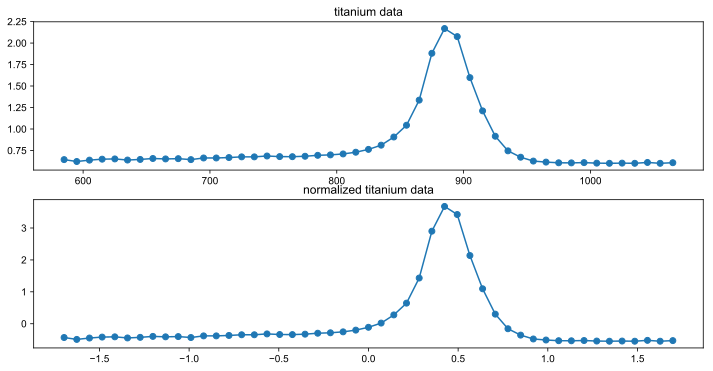

In [7]:
fig, ax = plt.subplots(2, 1)
__ = ax[0].plot(X_tit, y_tit, '-o')
__ = ax[0].set_title("titanium data")
__ = ax[1].plot(X_tit_norm, y_tit_norm, '-o')
__ = ax[1].set_title("normalized titanium data")

## [<<](#Table-of-Contents) Обучение моделей
**2 балла**

Рассмотрим 3 ядра: 
* Линейное
* Полиномиальное (`degree = 3`, `gamma = 6`, `coef0 = 1`)
* RBF (`gamma = 6`, `coef0 = 1`)

Во всех случаях установите точность алгоритма оптимизации `epsilon=0.01`

Для каждого из ядер:
1. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наилучшего параметра $C$ постройте график с данными и предсказанием с помощью SVM.

В каких случаях возникают эффекты недообучения, переобучения?

In [8]:
from sklearn.model_selection import train_test_split

Разбиение выборки на обучающую и тестовую части.

In [9]:
X_tit_train, X_tit_test, y_tit_train, y_tit_test = train_test_split(
    X_tit_norm, y_tit_norm, test_size=0.2, random_state=RANDOM_SEED
)
print(X_tit_train.shape, X_tit_test.shape)

(39,) (10,)


Формирование параметров для каждого рассматриеваемого ядра.

In [10]:
kernel_params_tit = {
    'linear': dict(epsilon=0.01),
    'poly': dict(epsilon=0.01, degree=3, gamma=6, coef0=1),
    'rbf': dict(epsilon=0.01, gamma=6, coef0=1)
}

Попытка вывести полученные после обучения модели опорные вектора для одного из ядер.

In [11]:
from sklearn.svm import SVR

In [12]:
%%time
model = SVR(kernel="rbf", C=1.0, **kernel_params_tit['rbf'])
__ = model.fit(X_tit_norm.reshape(-1, 1), y_tit_norm)

__ = plt.scatter(model.support_vectors_[:, 0], y_tit_norm[model.support_], 
                s=80, facecolors='none', edgecolors='k')
__ = plt.plot(X_tit_norm, y_tit_norm, '-o')

Wall time: 60 ms


Обучение моделей с ядрами **linear**, **poly**, **rbf** с различными значениями параметра $C$ (важность регуляризации).

In [13]:
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import ShuffleSplit, GridSearchCV

In [14]:
%%time
cv_tit_params = {
    'C': np.logspace(-4, 4, 8)  # only few values to reduce time for training
}

cv_scores_tit = {}
for kernel in ("linear", "poly", "rbf"):
    cv_grid = GridSearchCV(
        estimator=SVR(kernel=kernel, **kernel_params_tit[kernel]),
        param_grid=cv_tit_params,
        scoring=make_scorer(mean_absolute_error, greater_is_better=False), 
        cv=ShuffleSplit(n_splits=2, test_size=0.2, random_state=RANDOM_SEED)
    )
    cv_scores_tit[kernel] = cv_grid.fit(X_tit_train.reshape(-1, 1), y_tit_train)

Wall time: 1min 41s


Вывод графиков зависимости абсолютной ошибки от параметра $C$ (для МАЕ - чем меьше ошибка, тем лучше).

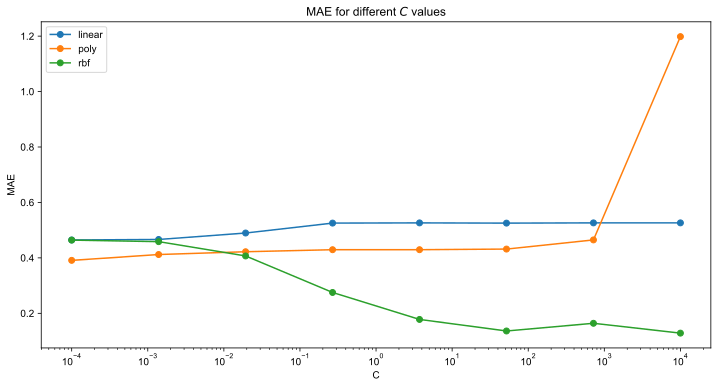

In [15]:
kernel_names = []
for kernel, model_res in cv_scores_tit.items():
    __ = plt.plot(model_res.param_grid['C'], -model_res.cv_results_['mean_test_score'], "-o")
    kernel_names.append(kernel)
__ = plt.xscale('log')
__ = plt.legend(kernel_names)
__ = plt.title("MAE for different $C$ values")
__ = plt.xlabel("C")
__ = plt.ylabel("MAE")

Выбор лучших параметов $C$ для каждой модели.

In [16]:
best_model_params_tit = {}
for kernel, model_res in cv_scores_tit.items():
    best_model_params_tit[kernel] = model_res.best_params_
    print(f"{kernel}:\t{model_res.best_params_}")

linear:	{'C': 0.0001}
poly:	{'C': 0.0001}
rbf:	{'C': 10000.0}


Построение предсказаний для моделей с лучшими параметрами.

Wall time: 1.41 s


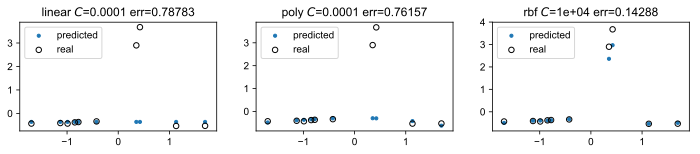

In [17]:
%%time
fig, ax = plt.subplots(1, 3, figsize=(12, 2))
for idx, (kernel, best_params) in enumerate(best_model_params_tit.items()):
    model = SVR(kernel=kernel, **kernel_params_tit[kernel], **best_params)
    __ = model.fit(X_tit_train.reshape(-1, 1), y_tit_train)
    y_hat = model.predict(X_tit_test.reshape(-1, 1))
    score = mean_absolute_error(y_tit_test, y_hat)
    
    __ = ax[idx].scatter(X_tit_test, y_hat, s=10)
    __ = ax[idx].scatter(X_tit_test, y_tit_test, s=30, facecolors='none', edgecolors='k')
    __ = ax[idx].legend(["predicted", "real"])
    __ = ax[idx].set_title(f"{kernel} $C$={best_params['C']:.5} err={score:.5}")

Вариант без разбиения на подвыборки (обучающую, тестовую).

In [18]:
%%time
cv_scores_tit_full = {}
for kernel in ("linear", "poly", "rbf"):
    cv_grid = GridSearchCV(
        estimator=SVR(kernel=kernel, **kernel_params_tit[kernel]),
        param_grid=cv_tit_params,
        scoring=make_scorer(mean_absolute_error, greater_is_better=False), 
        cv=ShuffleSplit(n_splits=2, test_size=0.2, random_state=RANDOM_SEED)
    )
    cv_scores_tit_full[kernel] = cv_grid.fit(X_tit_norm.reshape(-1, 1), y_tit_norm)

Wall time: 1min 39s


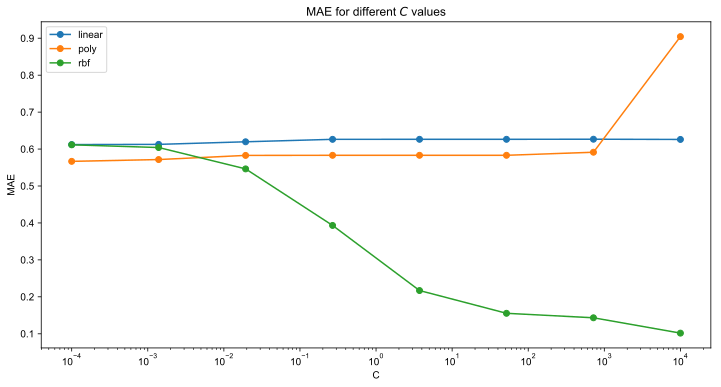

In [19]:
kernel_names_full = []
for kernel, model_res in cv_scores_tit_full.items():
    __ = plt.plot(model_res.param_grid['C'], -model_res.cv_results_['mean_test_score'], "-o")
    kernel_names_full.append(kernel)
__ = plt.xscale('log')
__ = plt.legend(kernel_names)
__ = plt.title("MAE for different $C$ values")
__ = plt.xlabel("C")
__ = plt.ylabel("MAE")

In [20]:
best_model_params_tit_full = {}
for kernel, model_res in cv_scores_tit_full.items():
    best_model_params_tit_full[kernel] = model_res.best_params_
    print(f"{kernel}:\t{model_res.best_params_}")

linear:	{'C': 0.0001}
poly:	{'C': 0.0001}
rbf:	{'C': 10000.0}


In [21]:
%%time
fig, ax = plt.subplots(1, 3, figsize=(12, 2))
for idx, (kernel, best_params) in enumerate(best_model_params_tit_full.items()):
    model = SVR(kernel=kernel, **kernel_params_tit[kernel], **best_params)
    __ = model.fit(X_tit_norm.reshape(-1, 1), y_tit_norm)
    y_hat = model.predict(X_tit_norm.reshape(-1, 1))
    score = mean_absolute_error(y_tit_norm, y_hat)
    
    __ = ax[idx].scatter(X_tit_norm, y_hat, s=10)
    __ = ax[idx].scatter(X_tit_norm, y_tit_norm, s=30, facecolors='none', edgecolors='k')
    __ = ax[idx].legend(["predicted", "real"])
    __ = ax[idx].set_title(f"{kernel} $C$={best_params['C']:.5} err={score:.5}")

Wall time: 1.37 s


<!-- В каких случаях возникают эффекты недообучения, переобучения? -->
#### [<<](#Table-of-Contents) Выводы
Из полученных результатов видно:
* Линейное и полиномиальное ядра плохо предсказывают нелинейные данные (недообучаются).
* Полимиальное ядро недообучается на малом числе данных.
* RBF способен быстро переобучиться на необычных данных/выбросах.

# Определение языка слова
**7 баллов**

В данном задании вам необходимо построить модель, которая будет определять, на каком языке написано слово. Сделать это будет предложено двумя способами.

Даны два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова.

## [<<](#Table-of-Contents) Загрузка 
**1 балл**

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [22]:
# read table with en words and add labels=1
df_w_en = pd.read_table(r"data/war_and_peace_en.txt", sep='\n', dtype=str, names=['word'])
df_w_en['label'] = np.ones(df_w_en.shape[0], dtype=int)
# read table with es words and add labels=0
df_w_es = pd.read_table(r"data/war_and_peace_es.txt", sep='\n', dtype=str, names=['word'])
df_w_es['label'] = np.zeros(df_w_es.shape[0], dtype=int)
# create composite table
df_w = pd.concat([df_w_en, df_w_es], axis=0, ignore_index=True)

df_w.head().T
df_w.tail().T

0    1      2    3        4
word   war  and  peace  leo  tolstoy
label    1    1      1    1        1

11398 11399   11400      11401      11402
word    cui   gli  ospiti  sarebbero  ritrovati
label     0     0       0          0          0

In [23]:
X_w = df_w.loc[:, 'word']
y_w = df_w.loc[:, 'label']

## [<<](#Table-of-Contents) Подход с n-граммами 
**2 балла**

На этом этапе предлагается построить модель используя n-граммы слов, то есть последовательностях из n символов.<br/>
Таким образом, признаками наших данных будут все найденные n-граммы слов, а значениями признаков будут частоты соответствующих n-грамм в слове.<br/>
Например, для слова "guerra" би-граммами будут "gu", "ue", "er", "rr", "ra", каждая из которых встречается в нем с частотой 1.

Для того, чтобы выделять n-граммы, удобно использовать `CountVectorizer()` с аргументами `analyzer='char'` и `ngram_range=(n_min, n_max)`. Вы наверняка встречались с этим векторизатором в предыдущем модуле.

Таким образом, сделайте следующее:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Разбейте данные на обучающую и отложенную выборку в пропорции 80/20
3. Составьте [`Pipeline`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), состоящий из `CountVectorizer()` и SVM с линейным ядром
4. Исследуйте, как влияют размер n-грамм и величина штрафа `C` на предсказательную силу модели. Мера качества - accuracy.

Разбиение набора данных на обучающую и тестовую выборки в пропорции 80/20.

In [24]:
X_w_train, X_w_test, y_w_train, y_w_test = train_test_split(X_w, y_w, test_size=0.2, random_state=RANDOM_SEED)
print(f"Shapes:\ttrain: {X_w_train.shape[0]}, test: {X_w_test.shape[0]}")

Shapes:	train: 9122, test: 2281


In [25]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

Обучение модели c фиксированными параметрами без использования `Pipeline`.

In [26]:
%%time
t_vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 2))
t_model = SVC(kernel='linear', random_state=RANDOM_SEED, C=1)
t_bow_train = t_vectorizer.fit_transform(X_w_train, y_w_train)
t_bow_test = t_vectorizer.transform(X_w_test)
print("manual:", accuracy_score(y_w_test, t_model.fit(t_bow_train, y_w_train).predict(t_bow_test)))

manual: 0.908811924594
Wall time: 3.55 s


Обучение модели c фиксированными параметрами через `Pipeline`.

In [27]:
%%time
t_pipeline = Pipeline([("vectorizer", t_vectorizer), ("model", t_model)])
print("pipeline:", accuracy_score(y_w_test, t_pipeline.fit(X_w_train, y_w_train).predict(X_w_test)))

pipeline: 0.908811924594
Wall time: 3.63 s


Составление `GridSearchCV` (*с небольшим разбросом параметров, поскольку компьютер не справляется с вычислениями*).

In [28]:
cv_params_w = {
    'model__C': np.logspace(-3, 1, 8),  # it's impossible for my PC to proceed C values higher then 10^1.5
    'vectorizer__ngram_range': tuple((i, j) for i in range(2, 8, 2) for j in range(2, 10, 2) if i <= j)
}

pipeline_w = Pipeline([
    ("vectorizer", CountVectorizer(analyzer='char')),
    ("model", SVC(kernel='linear', random_state=RANDOM_SEED))
])

cv_grid_w = GridSearchCV(
    estimator=pipeline_w,
    param_grid=cv_params_w,
    scoring='accuracy'
)

In [29]:
%%time
model_w_res = cv_grid_w.fit(X_w_train, y_w_train)
y_hat_w = cv_grid_w.predict(X_w_test)
print(f"Accuracy on test data: {accuracy_score(y_w_test, y_hat_w)}")

Accuracy on test data: 0.9451994739149496
Wall time: 11min 10s


Параметры лучшей модели.

In [30]:
best_model_w = model_w_res.best_estimator_.get_params(deep=False)['steps']
print(f"ngram_range = {best_model_w[0][1].ngram_range}")
print(f"C = {best_model_w[1][1].C}")

ngram_range = (2, 4)
C = 2.6826957952797246


Построение графиков по результатам обучения.

In [48]:
C_w_range = model_w_res.param_grid['model__C']
ngram_w_range = model_w_res.param_grid['vectorizer__ngram_range']
for idx, ngram in enumerate(ngram_w_range):
    __ = plt.plot(C_w_range, model_w_res.cv_results_['mean_test_score'][idx::len(ngram_w_range)], "-o")
__ = plt.xscale('log')
__ = plt.legend([f"ngrams {ngram}" for ngram in ngram_w_range])
__ = plt.title("Accuracy for different $C$ and $ngram$ values")
__ = plt.xlabel("$C$")
__ = plt.ylabel("$accuracy$")

Модель дает большую точность предсказаний с ростом $C$.<br/>
Предположительно, лучший результат дают ngram-ы в диапазоне длин от 2х до средней длины слова словаре, то есть `ngram` где-то среди (2,3)-(2,6).

In [32]:
mean_w_len = np.mean(tuple(len(word) for word in X_w))
print(f"Mean word len in document: {mean_w_len}")

Mean word len in document: 5.668859072173989


Так, как лучший результат в данном случае: (2, 4), то предположение кажется верным, поскольку с увеличением максимальной длины ngram на значения большие, чем средняя длина слова, `accuracy` не улучшается...

## Подход с пользовательским ядром
### [<<](#Table-of-Contents) Подготовка данных 
**1 балла**

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно может принимать **только** вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы `df.sample()` и `df.reset_index()`)
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 80/20


В результате вы должны получить вектор-столбец `X_train`, `X_test` с **индексами** слов и векторы `y_train`, `y_test` с метками классов.

Перемешение объектов. 

In [33]:
df_w_new = df_w.sample(len(df_w)//9, random_state=RANDOM_SEED).reset_index()
print(df_w_new.shape)
df_w_new.head().T

(1267, 3)


0     1     2     3     4
index       8872  8223  4691  1956  9298
word   contrasto   suo   her   her  bors
label          0     0     1     1     0

Разбиение данных.

In [34]:
X_w_new = df_w_new.loc[:, "index"]
y_w_new = df_w_new.loc[:, "label"]

X_w_train_n, X_w_test_n, y_w_train_n, y_w_test_n = train_test_split(X_w_new, y_w_new, test_size=0.2, random_state=RANDOM_SEED)
print(f"Shapes:\ttrain: {X_w_train_n.shape[0]}, test: {X_w_test_n.shape[0]}")

Shapes:	train: 1013, test: 254


### [<<](#Table-of-Contents) Расчет ядра 
**2 балла**

Теперь напишем собственное ядро для классификации строк. Для сравнения строк будем использовать [расстояние Левенштейна](https://ru.wikipedia.org/wiki/Расстояние_Левенштейна). Реализацию этого расстояния можно получить одним из двух способов:
* скопировать функцию wfi_levenshtein из файла [pylev.py](https://github.com/toastdriven/pylev/blob/master/pylev.py)
* поставить пакет [editdistance](https://pypi.python.org/pypi/editdistance) (будет работать быстрее, чем предыдущая реализация, но могут возникнуть проблемы с установкой)

Ядро для сравнения строк должно принимать максимальное значение, когда слова одинаковы, и минимальное, когда очень отличаются. Это противоположно свойствам расстояния Левенштейна: оно равно 0, когда слова одинаковы, и максимально, когда слова разные. Поэтому подставьте значение расстояния Левенштейна в какое-нибудь ядро, зависящее от расстояния между объектами (например, гауссовское).

Функция, реализующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во время обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).
Функция должна возвращать матрицу значений ядра для всех объектов попарно: $G_{ij} = K(U_i, V_j)$. Здесь $U_i$ — i-ый объект выборки $U$, а $V_j$ — j-ый объект выборки $V$.

Сделайте следующее:
1. Напишите функцию *string_kernel(U, V)*, расчитывающую матрицу ядра $G_{ij}$
2. Визуализируйте матрицу только для тренировочной выборки (функция plt.imshow()).


Рассмотрим различные ядра:
* Гауссовское: $$K(x, y) = e^{-\frac{\|x - y\|^{2}}{2\sigma^{2}}}$$
* Рациональное квадратичное: $$K(x, y) = 1 - \frac{\|x - y\|^{2}}{\|x - y\|^{2} + c}$$
* Гиперболический тангенс (сигмоида): $$K(x, y) = tanh(\alpha x^{T} + c)$$
* Мультиквадратичное (Multiquadric): $$K(x, y) = \sqrt{\|x - y\|^{2} + c^{2}}$$
* Логарифмическое: $$K(x, y) = log(\|x - y\|^{d} + 1)$$
* Волновое (Wave): $$K(x, y) = \frac{\theta}{\|x - y\|^{2}} sin(\frac{\|x - y\|^{2}}{\theta})$$

In [35]:
def gaussian_kernel(scorer, *args, **kwargs):
    sigma = kwargs.pop('sigma', None)
    if not sigma:
        return np.exp(-np.sum(np.power(scorer(*args), 2)))
    return np.exp(-np.sum(np.power(scorer(*args), 2)) / float(2 * sigma**2))

def rational_quadratic_kernel(scorer, *args, **kwargs):
    c = kwargs.pop('c', 1)
    score = scorer(*args)
    return 1 - score/(score + c)

def wave_kernel(scorer, *args, **kwargs):
    theta = kwargs.pop('theta', 1)
    bias = kwargs.pop('bias', 0)
    score = scorer(*args) + bias
    return theta/score*np.sin(score/theta)

# not suitable kernels as they're non-positive

def sigmoid_kernel(scorer, *args, **kwargs):
    alpha = kwargs.pop('alpha', 1)
    c = kwargs.pop('c', 0)
    return np.tanh(alpha * scorer(*args) + c)

def multiquadric_kernel(scorer, *args, **kwargs):
    c = kwargs.pop('c', 1)
    return np.sqrt(scorer(*args) + c**2)

def log_kernel(scorer, *args, **kwargs):
    return np.log(scorer(*args) + 1)

In [36]:
from pylev import wfi_levenshtein

Создание функции, которая:
1. принимает на вход индексы строк в корпусе (U, V);
2. находит слова с заданными индексами (words_u, words_v) в корпусе (document);
2. выполняет сравнение строк с помощью расстояния Левенштейна (scorer); 
3. преобразует полученные расстояния с помощью переданного ядра (K).

In [136]:
def string_kernel(U, V, **kwargs):
    K = kwargs.pop('K', gaussian_kernel)
    document = kwargs.pop('document', X_w)
    scorer = kwargs.pop('scorer', wfi_levenshtein)
    if isinstance(U, pd.core.series.Series):
        words_u = tuple(document.iloc[idx] for idx in U)
        words_v = tuple(document.iloc[idx] for idx in V)
    else:
        # What's wrong with indexes here?!
        words_u = tuple(document.iloc[int(idx[0])] for idx in U)
        words_v = tuple(document.iloc[int(idx[0])] for idx in V)
    gram_matrix = np.zeros((len(words_u), len(words_v)))
    for i, u in enumerate(words_u):
        for j, v in enumerate(words_v):
            gram_matrix[i, j] = K(scorer, u, v, **kwargs)
    return gram_matrix

Визуализация работы ядер на тестовом подмножестве выборки.<br/> Результирующие матрицы запоминаются в `kernels_matrixes` для дальнейшего использования при обучении.

In [38]:
from time import time

In [39]:
param_kernels = {
    'gaussian': dict(K=gaussian_kernel),
    'rational quadratic': dict(K=rational_quadratic_kernel),
    'wave': dict(K=wave_kernel, bias=0.0001),
    'sigmoid': dict(K=sigmoid_kernel, alpha=1/X_w_test_n.shape[0]),
    'multiquadric': dict(K=multiquadric_kernel),
    'log': dict(K=log_kernel)
}
non_positive_kernels = {'sigmoid', 'multiquadric', 'log'}

В данном случае, деление на ноль намеренно проигнорированно, поскольку не нашлось оптимального решения.

gaussian time: 11.6s
rational quadratic time: 7.41s
wave time: 7.96s
sigmoid time: 8.1s


C:\Users\d_pch\Miniconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\d_pch\Miniconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


multiquadric time: 8.0s
log time: 7.76s
Wall time: 4min 5s


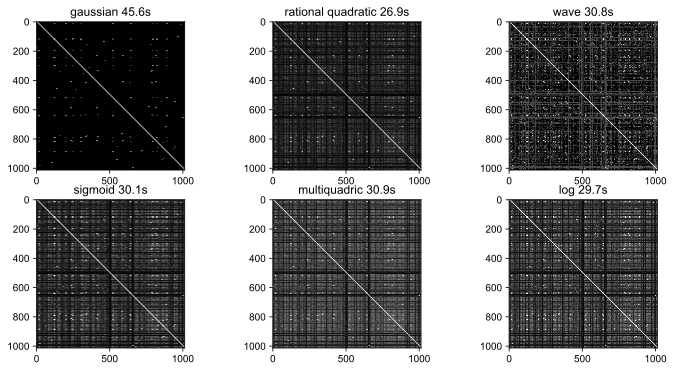

In [50]:
%%time
fig, ax = plt.subplots(len(param_kernels)//3, 3)

kernels_matrixes = {}
for idx, (kernel, params) in enumerate(param_kernels.items()):
    kernels_matrixes[kernel] = {}
    start_t = time()
    kernels_matrixes[kernel]['train'] = string_kernel(X_w_train_n, X_w_train_n, **params)
    __ = ax[idx//3][idx%3].set_title(f"{kernel} {time() - start_t:.3}s")
    start_t = time()
    kernels_matrixes[kernel]['test'] = string_kernel(X_w_test_n, X_w_train_n, **params)
    print(f"{kernel} time: {time() - start_t:.3}s")
    if kernel in non_positive_kernels:
        # res += 10**(-7)  # add constant bias to avoid zero division
        kernels_matrixes[kernel]['train'] = 1/kernels_matrixes[kernel]['train']  # result inversion
        kernels_matrixes[kernel]['test'] = 1/kernels_matrixes[kernel]['test']  # result inversion
    __ = ax[idx//3][idx%3].imshow(kernels_matrixes[kernel]['train'], cmap=plt.cm.Greys_r)

Гауссовское ядро считается дольше всего.<br/> 
Самым быстрым оказывается рациональное квадратичное ядро.

### [<<](#Table-of-Contents) Оценка качества
**1 балл**

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке. Для улучшения качества можно увеличить размер тренировочной выборки. Но тогда обучение будет происходить дольше.

Попытка обучить модель с заранее вычисленным ядром.

In [58]:
%%time

classifier = SVC(kernel="precomputed")
string_kernel_scores = {}
for kernel, results in kernels_matrixes.items():
    try:
        start_t = time()
        model_w = classifier.fit(results['train'], y_w_train_n)
        print(f"{kernel} times (train/test): {time() - start_t:.3}s", end='/')
        start_t = time()
        y_hat_n = model_w.predict(results['test'])
        print(f"{time() - start_t:.3}s")
        string_kernel_scores[kernel] = accuracy_score(y_hat_n, y_w_test_n)
    except ValueError:
        __ = string_kernel_scores.pop(kernel, None)  # remove errored kernel from results

gaussian times (train/test): 0.031s/0.001s
rational quadratic times (train/test): 0.013s/0.002s
wave times (train/test): 0.008s/0.001s
multiquadric times (train/test): 0.012s/0.002s
Wall time: 78 ms


Обучение и предсказание моделей с помощью трюка с ядром на обученном ядре происходит очень быстро.

In [59]:
for kernel, score in string_kernel_scores.items():
    print(f"{kernel} accuracy: {score}")

gaussian accuracy: 0.84251968503937
rational quadratic accuracy: 0.8976377952755905
wave accuracy: 0.6771653543307087
multiquadric accuracy: 0.9015748031496063


Подбор параметров.

In [60]:
cv_params_w_n = {
    'C': np.logspace(-3, 2, 11)
}

cv_grid_w_n = GridSearchCV(
    estimator=SVC(kernel="precomputed"),
    param_grid=cv_params_w_n,
    scoring='accuracy'
)

Обучение моделей.

In [62]:
%%time
final_model = {}
for kernel in string_kernel_scores:
    final_model[kernel] = cv_grid_w_n.fit(kernels_matrixes[kernel]['train'], y_w_train_n)

Wall time: 2.42 s


In [150]:
fin_res = []
for kernel, model in final_model.items():
    fin_res.append(model.best_score_)
    print(f"{kernel:25.25} C={model.best_estimator_.C:.5}::best score: {model.best_score_}")

gaussian                  C=3.1623::best score: 0.8864758144126358
rational quadratic        C=3.1623::best score: 0.8864758144126358
wave                      C=3.1623::best score: 0.8864758144126358
multiquadric              C=3.1623::best score: 0.8864758144126358


In [152]:
if max(fin_res) >= 0.7:
    print(f"Лучший результат по $accuracy$ > 70%: {max(fin_res)*100:.2}%")
else:
    print(f"Добиться $accuracy$ > 70% не удалось: {max(fin_res)*100:.2}%")

Лучший результат по $accuracy$ > 70%: 8.9e+01%


In [64]:
for kernel, model in final_model.items():
    __ = plt.plot(cv_params_w_n['C'], model.cv_results_['mean_test_score'], "-o")
__ = plt.xscale('log')
__ = plt.legend([f"kernel {kernel}" for kernel in kernels_matrixes])
__ = plt.title("Accuracy for different $C$ and $kernel$ values")
__ = plt.xlabel("$C$")
__ = plt.ylabel("$accuracy$")

*Довольно странно, что результаты подбора параметров для всех ядер получились одинаковыми...*<br/>
Что видимо, верно [>>](#Проверка-странных-результатов).

In [67]:
final_results = {}
for kernel, model in final_model.items():
    y_hat = model.predict(kernels_matrixes[kernel]['test'])
    print(f"{kernel} accuracy on test data: {accuracy_score(y_hat, y_w_test_n)}")

gaussian accuracy on test data: 0.7795275590551181
rational quadratic accuracy on test data: 0.889763779527559
wave accuracy on test data: 0.5511811023622047
multiquadric accuracy on test data: 0.9094488188976378


Лучшие результаты на даной выборке показывает мультиквадратичное ядро.

###### Проверка странных результатов
*Попытка обучить модель через передачу ядра в модель через параметр `kernel`.*<br/>
*Параметры указаны только для проведения эксперимента.*

In [142]:
cv_params_w_n = {
    'C': np.logspace(-1, 1, 3),
    'kernel': tuple(lambda U, V: string_kernel(U, V, K=k) 
                    for k in (rational_quadratic_kernel, multiquadric_kernel))
}

cv_new_final = GridSearchCV(
    estimator=SVC(),
    param_grid=cv_params_w_n,
    scoring='accuracy',
    cv=2
)

In [143]:
%%time
cv_final_res = cv_new_final.fit(X_w_train_n.values.reshape(-1, 1), y_w_train_n)

Wall time: 5min 13s


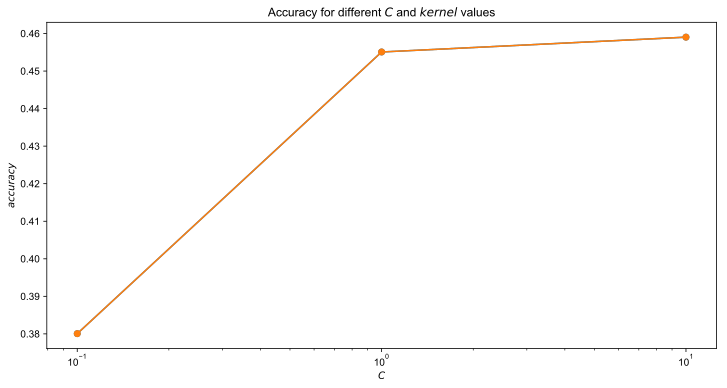

In [149]:
C_final_range = cv_final_res.param_grid['C']
kernel_final_range = cv_final_res.param_grid['kernel']
for idx, kernel in enumerate(kernel_final_range):
    __ = plt.plot(C_final_range, cv_final_res.cv_results_['mean_test_score'][idx::len(kernel_final_range)], "-o", label=kernel)
__ = plt.xscale('log')
__ = plt.title("Accuracy for different $C$ and $kernel$ values")
__ = plt.xlabel("$C$")
__ = plt.ylabel("$accuracy$")

*Результаты подбора параметров для всех ядер оказываются также одинаковыми.*